# Tensorflow load dataset

In [2]:
from  tensorflow.keras.utils import image_dataset_from_directory

2023-03-22 16:42:18.150820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 16:42:19.109871: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 16:42:19.110027: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-22 16:42:21.361950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
images_train, images_test = image_dataset_from_directory(
                                                    directory = '../../raw_data/cropped/',
                                                    labels = 'inferred',
                                                    label_mode='categorical',
                                                    class_names=['Angela','Dwight','Jim','Kevin','Michael','Pam'],
                                                    image_size = (128,128),
                                                    seed = 42,
                                                    validation_split = 0.2,
                                                    subset = 'both',
                                                    interpolation = 'bicubic',
                                                    crop_to_aspect_ratio = True)

Found 1166 files belonging to 6 classes.
Using 933 files for training.
Using 233 files for validation.


2023-03-22 16:42:28.543533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-22 16:42:28.543826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 16:42:28.543896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-22 16:42:28.543977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-22 16:42:28.544031: W tensorf

# images output

In [4]:
import matplotlib.pyplot as plt

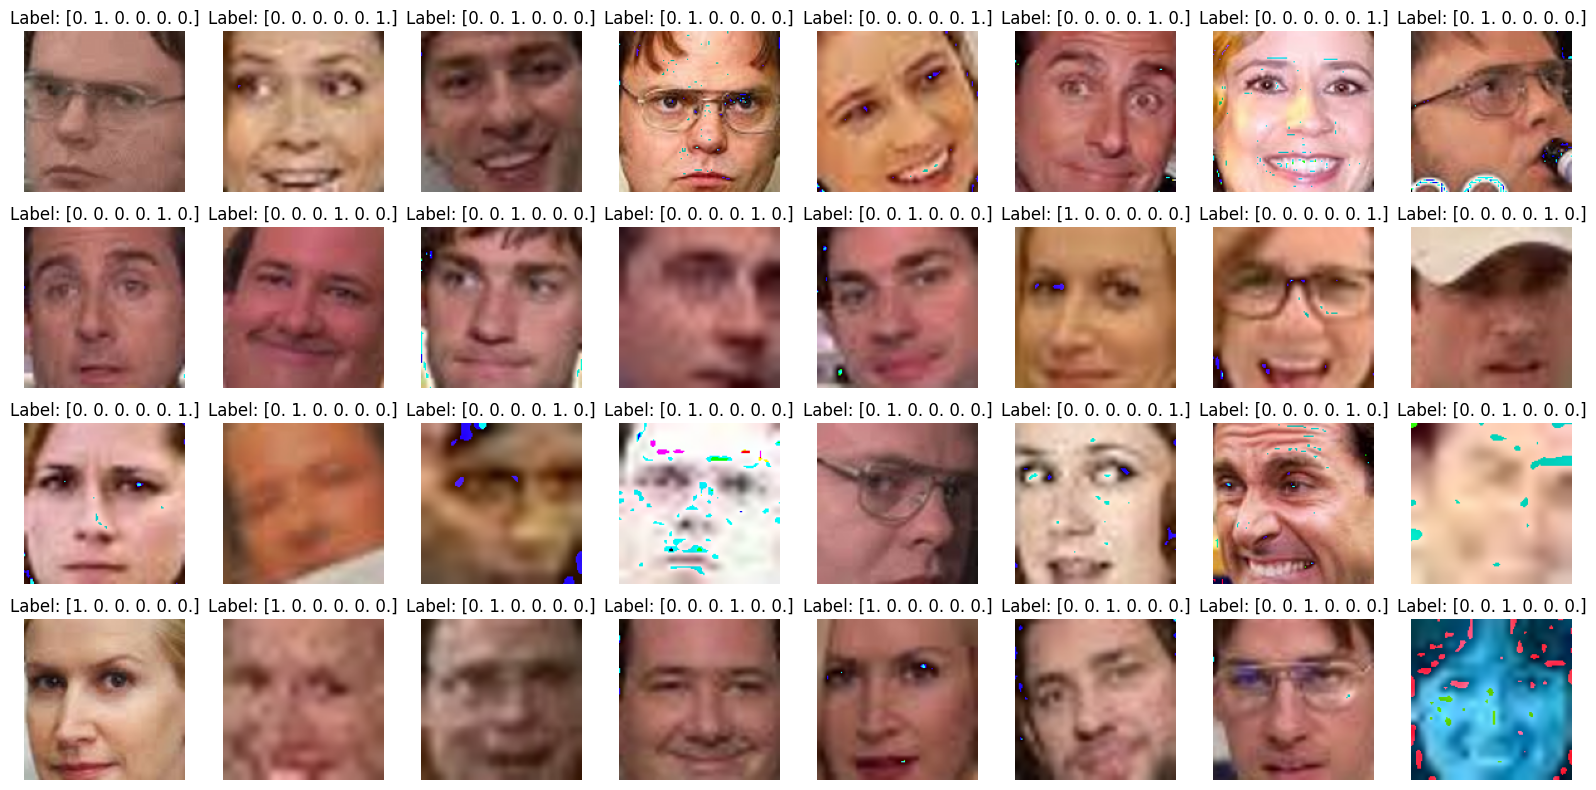

In [5]:
# Get one batch of images and labels
for images, labels in images_train.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(f'Label: {labels[i]}')
    plt.tight_layout()
    plt.show()

# Base-model ResNet50

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained VGG16 model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 32,010,246
Trainable params: 8,422,534
Non

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy',patience = 20,restore_best_weights=True)

In [12]:
history = model.fit(images_train,
                  epochs = 500,
                  batch_size=32,
                  verbose=1,
                  validation_data=images_test,
                  callbacks = [es]
              )

Epoch 1/500
30/30 [==============================] - 58s 2s/step - loss: 9.2344 - accuracy: 0.2851 - val_loss: 1.6569 - val_accuracy: 0.4850
Epoch 2/500
30/30 [==============================] - 43s 1s/step - loss: 1.6721 - accuracy: 0.4512 - val_loss: 1.2546 - val_accuracy: 0.5622
Epoch 3/500
30/30 [==============================] - 41s 1s/step - loss: 1.2524 - accuracy: 0.5380 - val_loss: 1.1020 - val_accuracy: 0.5837
Epoch 4/500
30/30 [==============================] - 33s 1s/step - loss: 1.0884 - accuracy: 0.5788 - val_loss: 0.9922 - val_accuracy: 0.6395
Epoch 5/500
30/30 [==============================] - 39s 1s/step - loss: 1.0656 - accuracy: 0.6195 - val_loss: 0.8689 - val_accuracy: 0.7253
Epoch 6/500
30/30 [==============================] - 43s 1s/step - loss: 0.9943 - accuracy: 0.6249 - val_loss: 1.0161 - val_accuracy: 0.6137
Epoch 7/500
30/30 [==============================] - 48s 2s/step - loss: 0.9118 - accuracy: 0.6570 - val_loss: 0.8541 - val_accuracy: 0.6910
Epoch 8/500
3

In [ ]:
# %tensorboard --logdir logs/fit

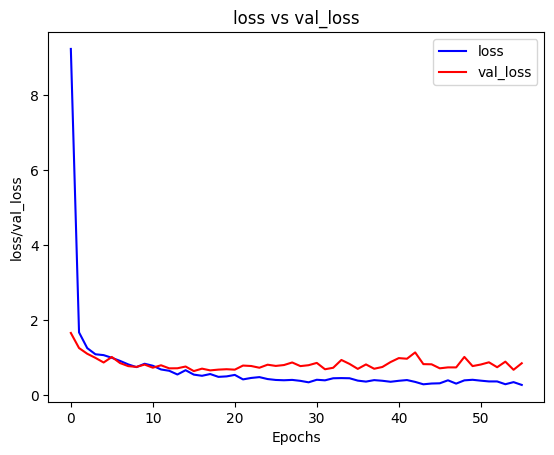

In [14]:
plt.plot(model.history.history['loss'],color='b',label='loss')
plt.plot(model.history.history['val_loss'],color='r',label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss/val_loss')
plt.title('loss vs val_loss')
plt.show()

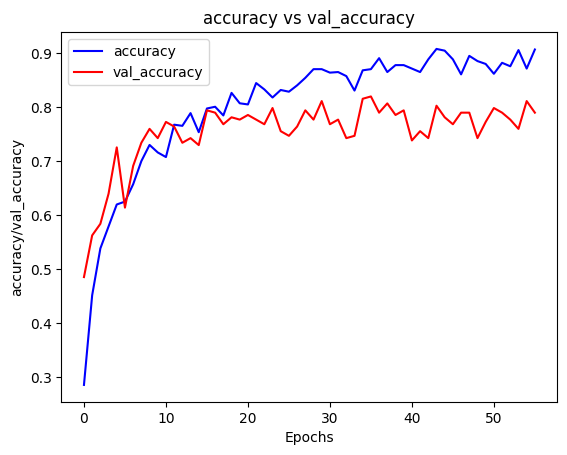

In [15]:
plt.plot(model.history.history['accuracy'],color='b',label = 'accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy/val_accuracy')
plt.title('accuracy vs val_accuracy')
plt.show()

In [16]:
model.evaluate(images_test
              )

8/8 [==============================] - 7s 786ms/step - loss: 0.6986 - accuracy: 0.8197


[0.6985719203948975, 0.8197425007820129]

# ResNet50 optimized

In [21]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained VGG16 model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [24]:
history = model.fit(images_train,
                  epochs = 100,
                  batch_size=32,
                  verbose=1,
                  validation_data=images_test,
                  callbacks = [es]
              )

Epoch 1/100
30/30 [==============================] - 29s 786ms/step - loss: 2.4857 - accuracy: 0.1919 - val_loss: 1.6383 - val_accuracy: 0.3948
Epoch 2/100
30/30 [==============================] - 22s 725ms/step - loss: 1.7691 - accuracy: 0.2787 - val_loss: 1.5681 - val_accuracy: 0.4506
Epoch 3/100
30/30 [==============================] - 23s 779ms/step - loss: 1.6267 - accuracy: 0.3344 - val_loss: 1.4341 - val_accuracy: 0.4549
Epoch 4/100
30/30 [==============================] - 24s 792ms/step - loss: 1.5391 - accuracy: 0.3837 - val_loss: 1.3922 - val_accuracy: 0.4850
Epoch 5/100
30/30 [==============================] - 24s 797ms/step - loss: 1.4825 - accuracy: 0.4116 - val_loss: 1.2662 - val_accuracy: 0.5236
Epoch 6/100
30/30 [==============================] - 24s 817ms/step - loss: 1.3883 - accuracy: 0.4855 - val_loss: 1.2645 - val_accuracy: 0.5107
Epoch 7/100
30/30 [==============================] - 23s 767ms/step - loss: 1.3602 - accuracy: 0.4695 - val_loss: 1.2493 - val_accuracy:

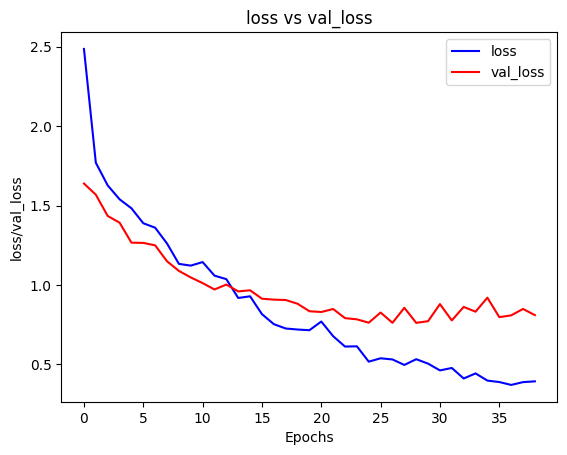

In [25]:
plt.plot(model.history.history['loss'],color='b',label='loss')
plt.plot(model.history.history['val_loss'],color='r',label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss/val_loss')
plt.title('loss vs val_loss')
plt.show()

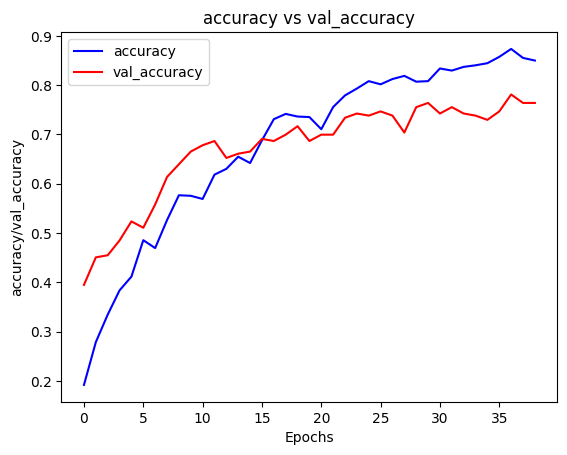

In [26]:
plt.plot(model.history.history['accuracy'],color='b',label = 'accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy/val_accuracy')
plt.title('accuracy vs val_accuracy')
plt.show()

In [27]:
model.evaluate(images_test
              )

8/8 [==============================] - 5s 559ms/step - loss: 0.7612 - accuracy: 0.7554


[0.7612152695655823, 0.7553648352622986]

In [17]:
images_train.cardinality().numpy()

30

In [18]:
images_test.cardinality().numpy()

8

# Predict

In [14]:
images_test_main = image_dataset_from_directory(
                                                   directory = '../data/cast/',
                                                    labels = None,label_mode=None,
                                                    image_size = (50,50),
                                                    seed = 42,
                                                    interpolation = 'bicubic',
                                                    crop_to_aspect_ratio = True)

Found 28 files belonging to 1 classes.


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 28 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

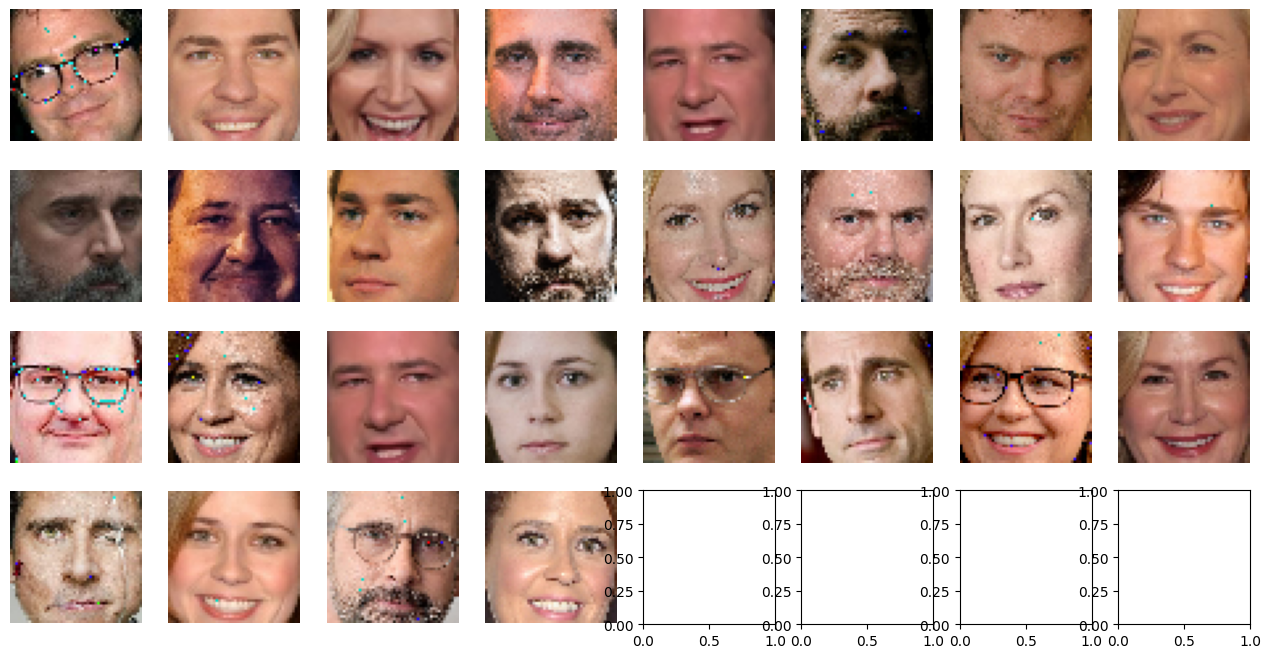

In [15]:
for images in images_test_main.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
#         ax.set_title(f'Label: {labels[i]}')
    plt.tight_layout()
    plt.show()

In [16]:
result = model.predict(images_test_main)

1/1 [==============================] - 7s 7s/step


In [17]:
result.shape

(28, 6)

In [18]:
import numpy as np
lables = np.argmax(result,axis=1)
lables 

array([0, 4, 1, 3, 1, 1, 0, 4, 5, 2, 3, 1, 1, 2, 4, 2, 0, 5, 4, 3, 1, 2,
       0, 4, 4, 0, 4, 5])

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 28 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

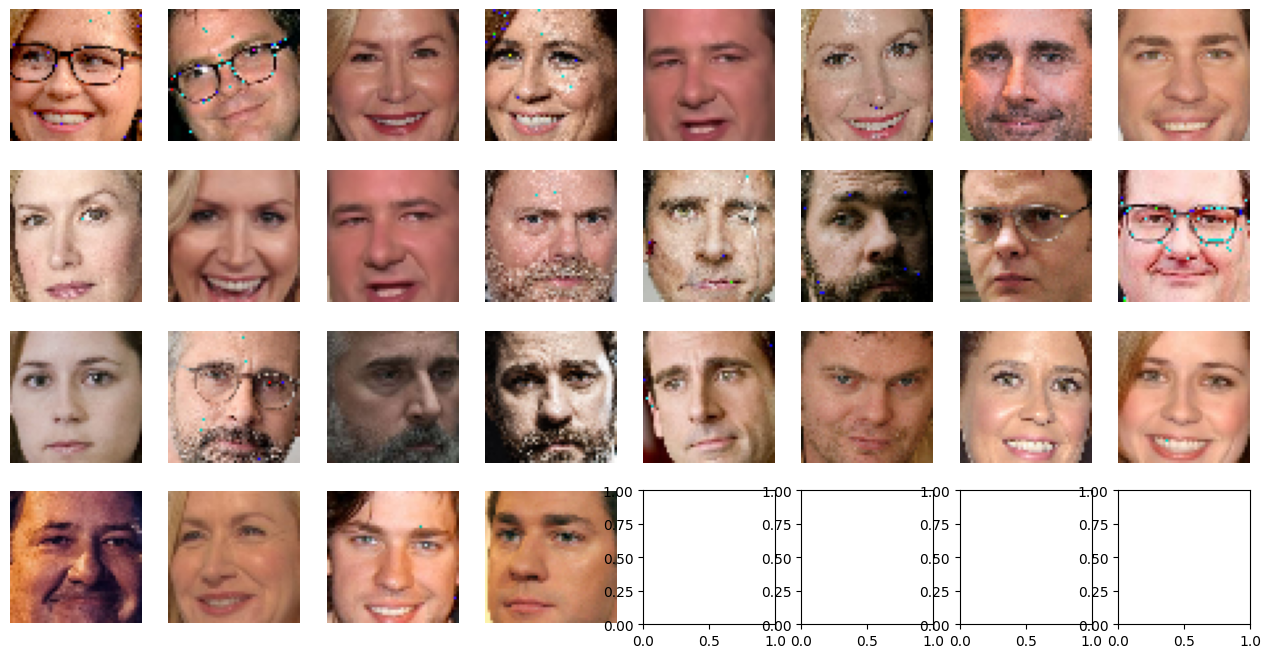

In [21]:
for images in images_test_main.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
#         ax.set_title(f'Label: {labels[i]}')
    plt.tight_layout()
    plt.show()